In [1]:
import pandas as pd, numpy as np
from pathlib import Path
from vivarium import Artifact
import db_queries
from get_draws.api import get_draws

from vivarium_testing_utils.automated_validation import ValidationContext

from vivarium_gates_mncnh.validation.measures import NeonatalCauseSpecificMortalityRisk

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
results_dir = Path('/mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/results/automated_vv/ethiopia/2025_12_19_14_51_22/')

In [4]:
# Create validation context
vc = ValidationContext(results_dir)

In [5]:
vc.age_groups

,,
age_start,age_end,age_group
0.000000,0.019178,Early Neonatal
0.019178,0.076712,Late Neonatal
0.076712,0.500000,1-5 months
0.500000,1.000000,6-11 months
1.000000,2.000000,12 to 23 months
2.000000,5.000000,2 to 4
5.000000,10.000000,5 to 9
10.000000,15.000000,10 to 14
15.000000,20.000000,15 to 19


In [6]:
# List outputs
vc.get_sim_outputs()

['abortion_miscarriage_ectopic_pregnancy_counts',
 'abortion_miscarriage_ectopic_pregnancy_ylds',
 'all_causes_relative_risk',
 'anc_hemoglobin',
 'anc_other',
 'antibiotics',
 'azithromycin',
 'births',
 'cpap',
 'maternal_disorders_burden_observer_disorder_deaths',
 'maternal_disorders_burden_observer_disorder_ylls',
 'maternal_hemorrhage_counts',
 'maternal_hemorrhage_ylds',
 'maternal_obstructed_labor_and_uterine_rupture_counts',
 'maternal_obstructed_labor_and_uterine_rupture_ylds',
 'maternal_sepsis_and_other_maternal_infections_counts',
 'maternal_sepsis_and_other_maternal_infections_ylds',
 'misoprostol',
 'neonatal_acmrisk_count',
 'neonatal_acmrisk_nonzero_count',
 'neonatal_acmrisk_sum',
 'neonatal_acmrisk_sum_of_squares',
 'neonatal_burden_observer_disorder_deaths',
 'neonatal_burden_observer_disorder_ylls',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_death_counts',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_relative_risk',
 'neonatal_impossib

In [7]:
# Artifact keys
vc.get_artifact_keys()

['cause.abortion_miscarriage_ectopic_pregnancy.cause_specific_mortality_rate',
 'cause.abortion_miscarriage_ectopic_pregnancy.incidence_rate',
 'cause.abortion_miscarriage_ectopic_pregnancy.yld_rate',
 'cause.all_causes.adjusted_birth_counts',
 'cause.all_causes.all_cause_mortality_risk',
 'cause.all_causes.cause_specific_mortality_rate',
 'cause.ectopic_pregnancy.raw_incidence_rate',
 'cause.facility_choice.bemonc_facility_fraction',
 'cause.facility_choice.probability_bemonc_birth',
 'cause.facility_choice.probability_cemonc_birth',
 'cause.facility_choice.probability_home_birth',
 'cause.facility_choice.probability_home_birth_given_full_term',
 'cause.facility_choice.probability_home_birth_given_preterm',
 'cause.maternal_abortion_and_miscarriage.raw_incidence_rate',
 'cause.maternal_hemorrhage.cause_specific_mortality_rate',
 'cause.maternal_hemorrhage.incidence_rate',
 'cause.maternal_hemorrhage.yld_rate',
 'cause.maternal_obstructed_labor_and_uterine_rupture.cause_specific_mortal

In [8]:
# Subset to neonatal mortality risk artifact keys
[key for key in vc.get_artifact_keys() if "mortality_risk" in key]

['cause.all_causes.all_cause_mortality_risk',
 'cause.neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma.mortality_risk',
 'cause.neonatal_preterm_birth.mortality_risk',
 'cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk']

In [17]:
# Simulation outputs
vc.get_sim_outputs()

['abortion_miscarriage_ectopic_pregnancy_counts',
 'abortion_miscarriage_ectopic_pregnancy_ylds',
 'all_causes_relative_risk',
 'anc_hemoglobin',
 'anc_other',
 'antibiotics',
 'azithromycin',
 'births',
 'cpap',
 'maternal_disorders_burden_observer_disorder_deaths',
 'maternal_disorders_burden_observer_disorder_ylls',
 'maternal_hemorrhage_counts',
 'maternal_hemorrhage_ylds',
 'maternal_obstructed_labor_and_uterine_rupture_counts',
 'maternal_obstructed_labor_and_uterine_rupture_ylds',
 'maternal_sepsis_and_other_maternal_infections_counts',
 'maternal_sepsis_and_other_maternal_infections_ylds',
 'misoprostol',
 'neonatal_acmrisk_count',
 'neonatal_acmrisk_nonzero_count',
 'neonatal_acmrisk_sum',
 'neonatal_acmrisk_sum_of_squares',
 'neonatal_burden_observer_disorder_deaths',
 'neonatal_burden_observer_disorder_ylls',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_death_counts',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_relative_risk',
 'neonatal_impossib

In [19]:
[o for o in vc.get_sim_outputs() if 'death_counts' in o]

['neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_death_counts',
 'neonatal_preterm_birth_with_rds_death_counts',
 'neonatal_preterm_birth_without_rds_death_counts',
 'neonatal_sepsis_and_other_neonatal_infections_death_counts',
 'other_causes_death_counts']

In [9]:
sepsis_compare_key = "cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk"

In [10]:
# Add custom NeonatalCauseSpecificMortalityRisk measure class measure mapper
# This allows the ValidationContext to use custom measure classes that are not 
# included in the standard measure classes in VTU
vc.add_new_measure(sepsis_compare_key, NeonatalCauseSpecificMortalityRisk)

In [11]:
# Compare simulation outputs to artifact
vc.add_comparison(
    sepsis_compare_key,
    test_source="sim",
    ref_source="artifact",
)

2026-01-09 09:22:08.103 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:592 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f28afd0> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f29ce10>.
2026-01-09 09:22:12.060 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:592 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f464090> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f2b7f10>.
2026-01-09 09:22:15.496 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:592 - Rebinning DataFrame age groups from <vivarium_testing_utils.auto

In [12]:
# Comparison metadata
sepsis_metadata = vc.metadata(sepsis_compare_key)

2026-01-09 09:22:55.278 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-09 09:23:55.652 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


,Test Data,Reference Data
Property,,
Measure Key,cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk,cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk
Source,sim,artifact
Shared Indices,"age_group, input_draw, sex","age_group, input_draw, sex"
Source Specific Indices,"acs_availability,acs_eligibility,antibiotics_availability,cpap_availability,delivery_facility_type,preterm_birth,probiotics_availability,random_seed, scenario","year_end, year_start"
Size,"16,640,000 rows × 1 columns","12,500 rows × 1 columns"
Num Draws,10,250
Input Draws,"22, 60, 71, 79, 115, 118, 146,167, 197, 244",range(0-249)
Num Seeds,10,
Run Time,Dec 19 14:51 2025,Dec 17 11:04 2025


In [13]:
sepsis_csmrisk_frame = vc.get_frame(
    sepsis_compare_key, 
    # aggregate_draws=True, 
    # stratifications=[],
)
sepsis_csmrisk_frame

2026-01-09 09:23:55.756 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-09 09:24:01.163 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


test_rate  \
entity                                        measure        sex    age_group     input_draw              
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female 1-5 months    22                NaN   
                                                                                  60                NaN   
                                                                                  71                NaN   
                                                                                  79                NaN   
                                                                                  115               NaN   
...                                                                                                 ...   
                                                             Male   Late Neonatal 118          0.001360   
                                                                                  146          0.001897   
                                                                                  167          0.001586   
                                                                                  197          0.001781   
                                                                                  244          0.000936   

                                                                                              reference_rate  \
entity                                        measure        sex    age_group     input_draw                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female 1-5 months    22                     NaN   
                                                                                  60                     NaN   
                                                                                  71                     NaN   
                                                                                  79                     NaN   
                                                                                  115                    NaN   
...                                                                                                      ...   
                                                             Male   Late Neonatal 118               0.001292   
                                                                                  146               0.001894   
                                                                                  167               0.001603   
                                                                                  197               0.001635   
                                                                                  244               0.000953   

                                                                                              percent_error  
entity                                        measure        sex    age_group     input_draw                 
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female 1-5 months    22                    NaN  
                                                                                  60                    NaN  
                                                                                  71                    NaN  
                                                                                  79                    NaN  
                                                                                  115                   NaN  
...                                                                                                     ...  
                                                             Male   Late Neonatal 118              5.264119  
                                                                                  146              0.182875  
                                                                                  167             -1.033914  
                                   

In [14]:
sepsis_csmrisk_frame.index.names

FrozenList(['entity', 'measure', 'sex', 'age_group', 'input_draw'])

In [15]:
sepsis_csmrisk_neonates = vc.get_frame(
    sepsis_compare_key, 
    aggregate_draws=True, 
    # stratifications=[],
    filters={"age_group": ["Early Neonatal", "Late Neonatal"]}
)
sepsis_csmrisk_neonates

2026-01-09 09:24:01.288 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-09 09:24:06.790 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


test_mean  \
entity                                        measure        sex    age_group                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal   0.001092   
                                                                    Late Neonatal    0.000879   
                                                             Male   Early Neonatal   0.002102   
                                                                    Late Neonatal    0.001543   

                                                                                    test_2.5%  \
entity                                        measure        sex    age_group                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal   0.000665   
                                                                    Late Neonatal    0.000422   
                                                             Male   Early Neonatal   0.001091   
                                                                    Late Neonatal    0.000925   

                                                                                    test_97.5%  \
entity                                        measure        sex    age_group                    
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal    0.001452   
                                                                    Late Neonatal     0.001066   
                                                             Male   Early Neonatal    0.003148   
                                                                    Late Neonatal     0.002192   

                                                                                    reference_mean  \
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal        0.001110   
                                                                    Late Neonatal         0.000841   
                                                             Male   Early Neonatal        0.002217   
                                                                    Late Neonatal         0.001652   

                                                                                    reference_2.5%  \
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal        0.000601   
                                                                    Late Neonatal         0.000516   
                                                             Male   Early Neonatal        0.001022   
                                                                    Late Neonatal         0.000835   

                                                                                    reference_97.5%  
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal         0.001884  
                                                                    Late Neonatal          0.001245  
                                                             Male   Early Neonatal         0.003721  
                                                                    Late Neonatal          0.002436

2026-01-09 09:31:14.351 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-09 09:31:21.849 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


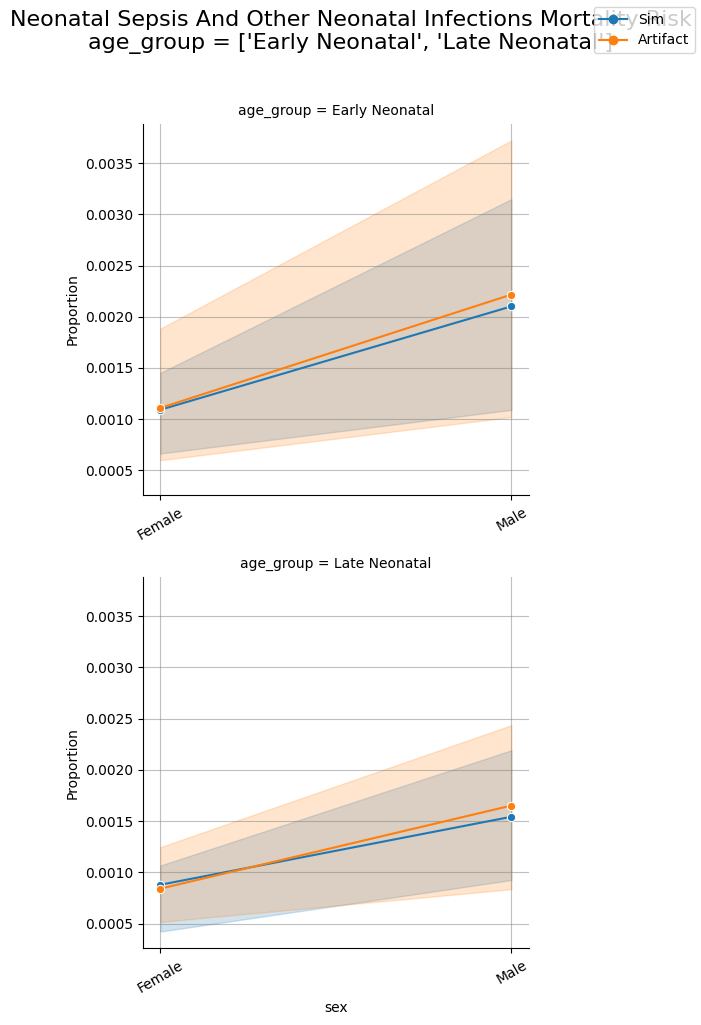

In [20]:
vc.plot_comparison(
    sepsis_compare_key, type="line", x_axis="sex", condition={"age_group": ['Early Neonatal', 'Late Neonatal']}, subplots=True
)

In [16]:
# Now let's compare the simulation to GBD
vc.add_comparison(
    sepsis_compare_key,
    test_source="sim",
    ref_source="gbd",
)

2026-01-09 09:24:17.913 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:592 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f2d5190> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f2d7150>.
2026-01-09 09:24:22.010 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:592 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f37e790> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7f499f288a50>.


InvalidQueryError: No functions available to pull data for measure mortality_risk.

In [ ]:
# Option 1: Researcher adds custom gbd to cache
# Option 2: Custom Measure intigrates option 1 